In [2]:
# read data

from mnist import MNIST
import numpy as np
mndata = MNIST("/Users/jigyayadav/Desktop/Codes/neuralnets253/HW1")
mndata.gz = True
images, labels = mndata.load_training() #Images is a list of 60000 images of 784 dimensions, Labels is a list of 60000 ints
imagesTest, labelsTest = mndata.load_testing()

In [59]:
images = np.array(images)
labels = np.array(labels)
imagesTest = np.array(imagesTest)
labelsTest = np.array(labelsTest)

images_train = images
images_test = imagesTest
labels_train = labels
labels_test = labelsTest
images_train = np.array(images_train)
labels_train = np.array(labels_train)
images_test = np.array(images_test)
labels_test = np.array(labels_test)

# Normalization
images_train = images_train*(1/127.5)
images_test = images_test*(1/127.5)
images_train = images_train-1.0
images_test = images_test-1.0

# Should this be appended after or before normalization
images_train = np.insert(images_train, 0, 1, axis=1)
images_test = np.insert(images_test, 0, 1, axis=1)

numFeatures = len(images[0, :])

# Divide between validation and training
from sklearn.model_selection import train_test_split
images_train, images_validation, labels_train, labels_validation = train_test_split(images_train, labels_train, test_size=0.10, random_state=42)

In [60]:
labelNums = 10

def labelsToVectForm(labels):
    vectForm = np.zeros((len(labels), labelNums))
    for i in range(len(labels)):
        vectForm[i][labels[i]] = 1
    return vectForm

t_train = labelsToVectForm(labels_train)
t_test = labelsToVectForm(labels_test)
t_validation = labelsToVectForm(labels_validation)

In [61]:
images_test.shape

(10000, 785)

In [84]:
from sklearn.metrics import accuracy_score
import math

# Forward propagation

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def getPredClass(y):
    predClass = np.argmax(y, axis=1)
    return predClass

def calculateOutput(x, W1, W2):
    A1 = x.dot(W1)
    Z1 = sigmoid(A1)
    X2 = np.insert(Z1, 0, 1, axis=1)
    A2 = X2.dot(W2)
    Y = np.exp(A2)/np.sum(np.exp(A2), axis=1, keepdims = True)
    return Y

def calculateCost(x, t, W1, W2):
    Y = calculateOutput(x, W1, W2)
    cost = -(1/len(x))*(np.sum(np.multiply(t, np.log(Y))))
    return cost

def calculateCostOneInstance(x, t, W1, W2, n):
    Y = calculateOutput(x, W1, W2)
    cost = (-1/len(x))*(np.multiply(t, np.log(Y)))
    return np.sum(cost[n, :])

def calculateAccuracy(x, labels, W1, W2):
    Y = calculateOutput(x, W1, W2)
    predClass = getPredClass(Y)
    return accuracy_score(labels, predClass)

epsilon = 0.001
learningRate = 0.8

batch_size = 128
batches = images_train.shape[0]//batch_size

In [83]:
highestValidationAccuracy = float('-inf')
bestLearningRate = 0.1

for learningRate in [0.8, 0.1, 0.01, 0.001]:
    W1 = np.random.uniform(low=-1.0, high=1.0, size=(785, 64))
    W2 = np.random.uniform(low=-1.0, high=1.0, size=(65, 10))
    prevValidationError = float('inf')
    minValidationError = float('inf')
    W1MinError = np.zeros(shape=(785, 64))
    W2MinError = np.zeros(shape=(65, 10))
    cnt = 0
    epochMinWeight = 0
    stoppingIteration = 0
    for epoch in range(5000):
#         learningRate = learningRate/(1+epoch/10000)
        print("Epoch = ", epoch, " ", learningRate)
        for b in range(batches):
            x = images_train[b*batch_size:(b+1)*batch_size]
            t = t_train[b*batch_size:(b+1)*batch_size]
            A1 = x.dot(W1)
            Z1 = sigmoid(A1)

            X2 = np.insert(Z1, 0, 1, axis=1)
            A2 = X2.dot(W2)
            Y = np.exp(A2)/np.sum(np.exp(A2), axis=1, keepdims = True)

            # Backward propagation
            W2_nobias = np.delete(W2, (0), axis=0)
            summation_k = (Y-t).dot(W2_nobias.T)
            g_derivative = Z1*(1-Z1)
            delE_Wij = x.T.dot(np.multiply(summation_k, g_derivative))
            delE_Wij = delE_Wij

            # Check approximate derivative
    #         for n in range(0, 150, 30):
    #             print("For input to hidden layers")
    #             for i in range(0, 785, 100):
    #                 for j in range(0, 64, 20):
    #                     del_En_Wij = (g_derivative[n][j]*summation_k[n][j]*x[n][i])/len(x)
    #                     modifiedW1 = W1
    #                     modifiedW1[i][j] += epsilon
    #                     costFunction1 = calculateCostOneInstance(x, t, modifiedW1, W2, n)
    #                     modifiedW1[i][j] -= 2*epsilon
    #                     costFunction2 = calculateCostOneInstance(x, t, modifiedW1, W2, n)
    #                     approx_delEn = (costFunction1-costFunction2)/(2*epsilon)
    #                     diff = abs(del_En_Wij-approx_delEn)
    #     #                 print(del_En_Wij, " ", approx_delEn)
    #                     if (diff > epsilon*epsilon):
    #                         print("Difference between approximate gradient = ", diff, " ", abs(epsilon*epsilon-diff))

    #             print("For hidden to output layers")
    #             for j in range(0, 65, 20):
    #                 for k in range(0, 10, 3):
    #                     actualDerivative = X2[n][j]*(Y[n][k]-t[n][k])/len(x)
    #                     modifiedW2 = W2
    #                     modifiedW2[j][k] += epsilon
    #                     costFunction1 = calculateCostOneInstance(x, t, W1, modifiedW2, n)
    #                     modifiedW2[j][k] -= 2*epsilon
    #                     costFunction2 = calculateCostOneInstance(x, t, W1, modifiedW2, n)
    #                     approximateDerivative = (costFunction1-costFunction2)/(2*epsilon)
    #                     diff = abs(actualDerivative-approximateDerivative)
    #     #                 print(actualDerivative, " ", approximateDerivative)
    #                     if (diff > epsilon*epsilon):
    #                         print("Difference between approximate gradient = ", diff, " ", abs(epsilon*epsilon-diff))

            W2 = W2-(learningRate/len(x))*((X2.T.dot(Y-t)))
            W1 = W1-(learningRate/len(x))*(delE_Wij)

        # Calculate validation error
        currTrainingError = calculateCost(images_train, t_train, W1, W2)
        currvalidationError = calculateCost(images_validation, t_validation, W1, W2)
        currTrainingAccuracy = calculateAccuracy(images_train, labels_train, W1, W2)
        currValidationAccuracy = calculateAccuracy(images_validation, labels_validation, W1, W2)
        currTestAccuracy = calculateAccuracy(images_test, labels_test, W1, W2)
        if (currvalidationError < minValidationError):
            W1MinError = W1
            W2MinError = W2
            epochMinWeight = epoch
            minValidationError = currvalidationError

        # Early stopping
        if (currvalidationError > prevValidationError):
                cnt += 1
                if (cnt >= 3):
                    stoppingIteration = epoch
                    break
        else:
            cnt = 0
        prevValidationError = currvalidationError


        print("Current training error = ", currTrainingError)
        print("Current validation error = ", currvalidationError)
        print("Current training accuracy = ", currTrainingAccuracy)
        print("Current validation accuracy = ", currValidationAccuracy)
        print("Current test accuracy = ", currTestAccuracy)

    print("Iteration of min weights = ", epochMinWeight)
    print("Stopping iteration = ", stoppingIteration)
    currValidationAccuracy = calculateAccuracy(images_validation, labels_validation, W1MinError, W2MinError)
    if (currValidationAccuracy > highestValidationAccuracy):
        highestValidationAccuracy = currValidationAccuracy
        bestLearningRate = learningRate

print("Best learning rate = ", bestLearningRate)

Epoch =  0   0.8
Current training error =  0.41144759358964
Current validation error =  0.4155564601645034
Current training accuracy =  0.8739259259259259
Current validation accuracy =  0.8716666666666667
Current test accuracy =  0.8754
Epoch =  1   0.8
Current training error =  0.33032687243480197
Current validation error =  0.33643196043004125
Current training accuracy =  0.9010185185185186
Current validation accuracy =  0.897
Current test accuracy =  0.9015
Epoch =  2   0.8


KeyboardInterrupt: 

In [85]:
# Final implementation with learning rate = 0.1

from sklearn.utils import shuffle
import matplotlib.pyplot as plt

numHiddenLayers = 64
numInputLayers = 785
numOutputLayers = 10

def gradientDescent(initialLearningRate, shuffleData, useMomentum, alpha, randomWeights, useSigmoid):
    global images_train, t_train, labels_train
    trainingAcc = []
    validationAcc = []
    testAcc = []
    trainingErr = []
    validationErr = []
    testErr = []
    if (useMomentum):
        v1 = np.zeros(shape=(numInputLayers, numHiddenLayers))
        v2 = np.zeros(shape=(numHiddenLayers+1, numOutputLayers))
    if (randomWeights):
        W1 = np.random.uniform(low=-1.0, high=1.0, size=(785, 64))
        W2 = np.random.uniform(low=-1.0, high=1.0, size=(65, 10))
    else:
        W1 = np.random.normal(loc=0.0, scale=1/math.sqrt(785), size=(785, 64))
        W2 = np.random.normal(loc=0.0, scale=1/math.sqrt(65), size=(65, 10))
        
    prevValidationError = float('inf')
    minValidationError = float('inf')
    W1MinError = np.zeros(shape=(numInputLayers, numHiddenLayers))
    W2MinError = np.zeros(shape=(numHiddenLayers+1, numOutputLayers))
    cnt = 0
    epochMinWeight = 0
    stoppingIteration = 0
    for epoch in range(200):
        learningRate = initialLearningRate/(1+epoch/2000)
        print("Epoch = ", epoch, " ", learningRate)
        if (shuffleData):
            images_train, t_train, labels_train = shuffle(images_train, t_train, labels_train)
        for b in range(batches+1):
            x = images_train[b*batch_size:min((b+1)*batch_size, len(images_train))]
            t = t_train[b*batch_size:min((b+1)*batch_size, len(images_train))]
            A1 = x.dot(W1)
            if (useSigmoid):
                Z1 = sigmoid(A1)
            else:
                Z1 = 1.7159*np.tanh((2/3)*A1)

            X2 = np.insert(Z1, 0, 1, axis=1)
            A2 = X2.dot(W2)
            Y = np.exp(A2)/np.sum(np.exp(A2), axis=1, keepdims = True)

            # Backward propagation
            W2_nobias = np.delete(W2, (0), axis=0)
            summation_k = (Y-t).dot(W2_nobias.T)
            if (useSigmoid):
                g_derivative = Z1*(1-Z1)
            else:
                g_derivative = 0.67*1.7159*(1-np.square(np.tanh((2/3)*A1)))
#             print(g_derivative.shape)
            delE_Wij = x.T.dot(np.multiply(summation_k, g_derivative))
            
            delE_Wij = delE_Wij/len(x)
            delE_Wjk = (X2.T.dot(Y-t))/len(x)
            if (useMomentum):
                v1 = alpha*v1 - learningRate*delE_Wij
                v2 = alpha*v2 - learningRate*delE_Wjk
                delW1 = v1
                delW2 = v2
            else:
                delW1 = -1*learningRate*delE_Wij
                delW2 = -1*learningRate*delE_Wjk
            W2 = W2+delW2
            W1 = W1+delW1

        currTrainingError = calculateCost(images_train, t_train, W1, W2)
        currvalidationError = calculateCost(images_validation, t_validation, W1, W2)
        currTestError = calculateCost(images_test, t_test, W1, W2)
        currTrainingAccuracy = calculateAccuracy(images_train, labels_train, W1, W2)
        currValidationAccuracy = calculateAccuracy(images_validation, labels_validation, W1, W2)
        currTestAccuracy = calculateAccuracy(images_test, labels_test, W1, W2)
        if (currvalidationError < minValidationError):
            W1MinError = W1
            W2MinError = W2
            epochMinWeight = epoch
            minValidationError = currvalidationError

        # Early stopping
        if (currvalidationError > prevValidationError):
                cnt += 1
                if (cnt >= 5):
                    stoppingIteration = epoch
                    break
        else:
            cnt = 0
        prevValidationError = currvalidationError
        
        trainingErr.append(currTrainingError)
        validationErr.append(currvalidationError)
        testErr.append(currTestError)
        trainingAcc.append(currTrainingAccuracy)
        validationAcc.append(currValidationAccuracy)
        testAcc.append(currTestAccuracy)
        
    # Plot all errors and accuracies
    plt.figure(1)
    plt.subplot(211)
    plt.plot(trainingErr, label='Train', color='blue')
    plt.plot(validationErr, label='Validation', color='green')
    plt.plot(testErr, label='Test', color='red')
    plt.ylabel('Loss function')
    plt.xlabel('Iterations')
    plt.legend()

    plt.subplot(212)
    plt.plot(trainingAcc, label='Train', color='blue')
    plt.plot(validationAcc, label='Validation', color='green')
    plt.plot(testAcc, label='Test', color='red')
    plt.ylabel('Accuracy')
    plt.xlabel('Iterations')
    plt.legend()
    plt.show()
    
    finalTestAccuracy = calculateAccuracy(images_test, labels_test, W1MinError, W2MinError)
    finalTrainingAccuracy = calculateAccuracy(images_train, labels_train, W1MinError, W2MinError)
    finalValidationAccuracy = calculateAccuracy(images_validation, labels_validation, W1MinError, W2MinError)
    print("Final training accuracy = ", finalTrainingAccuracy)
    print("Final validation accuracy = ", finalValidationAccuracy)
    print("Final test accuracy = ", finalTestAccuracy)
        
    return [trainingErr, validationErr, testErr, trainingAcc, validationAcc, testAcc]

Epoch =  0   0.1
Epoch =  1   0.09995002498750626
Epoch =  2   0.09990009990009992
Epoch =  3   0.09985022466300549
Epoch =  4   0.0998003992015968
Epoch =  5   0.09975062344139651
Epoch =  6   0.09970089730807578
Epoch =  7   0.09965122072745392
Epoch =  8   0.09960159362549802
Epoch =  9   0.09955201592832257
Epoch =  10   0.09950248756218907
Epoch =  11   0.09945300845350571
Epoch =  12   0.09940357852882704
Epoch =  13   0.09935419771485346
Epoch =  14   0.099304865938431
Epoch =  15   0.09925558312655086
Epoch =  16   0.09920634920634921
Epoch =  17   0.09915716410510661
Epoch =  18   0.09910802775024778
Epoch =  19   0.09905894006934125
Epoch =  20   0.09900990099009901
Epoch =  21   0.09896091044037607
Epoch =  22   0.09891196834817015
Epoch =  23   0.09886307464162135
Epoch =  24   0.09881422924901186
Epoch =  25   0.09876543209876544
Epoch =  26   0.0987166831194472
Epoch =  27   0.0986679822397632
Epoch =  28   0.09861932938856016
Epoch =  29   0.09857072449482504
Epoch =  30

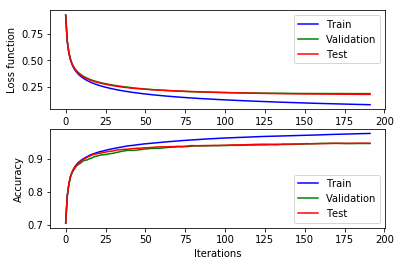

Final training accuracy =  0.9764444444444444
Final validation accuracy =  0.9466666666666667
Final test accuracy =  0.9475


In [86]:
result = gradientDescent(0.1, False, False, 0.0, True, True)

Epoch =  0   0.1
Epoch =  1   0.09995002498750626
Epoch =  2   0.09990009990009992
Epoch =  3   0.09985022466300549
Epoch =  4   0.0998003992015968
Epoch =  5   0.09975062344139651
Epoch =  6   0.09970089730807578
Epoch =  7   0.09965122072745392
Epoch =  8   0.09960159362549802
Epoch =  9   0.09955201592832257
Epoch =  10   0.09950248756218907
Epoch =  11   0.09945300845350571
Epoch =  12   0.09940357852882704
Epoch =  13   0.09935419771485346
Epoch =  14   0.099304865938431
Epoch =  15   0.09925558312655086
Epoch =  16   0.09920634920634921
Epoch =  17   0.09915716410510661
Epoch =  18   0.09910802775024778
Epoch =  19   0.09905894006934125
Epoch =  20   0.09900990099009901
Epoch =  21   0.09896091044037607
Epoch =  22   0.09891196834817015
Epoch =  23   0.09886307464162135
Epoch =  24   0.09881422924901186
Epoch =  25   0.09876543209876544
Epoch =  26   0.0987166831194472
Epoch =  27   0.0986679822397632
Epoch =  28   0.09861932938856016
Epoch =  29   0.09857072449482504
Epoch =  30

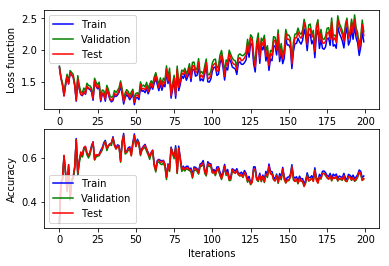

Final training accuracy =  0.7109444444444445
Final validation accuracy =  0.698
Final test accuracy =  0.7039


In [79]:
result = gradientDescent(0.1, True, True, 0.9, False, False)